In [1]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import nltk

In [4]:
mfine_reviews = pd.read_csv('mfine.csv')
practo_reviews = pd.read_csv('practo.csv')
apollo_reviews = pd.read_csv('apollo.csv')
lybrate_reviews = pd.read_csv('lybrate.csv')
tata_1_mg_reviews = pd.read_csv('tata_1_mg.csv')

In [5]:
reviews = pd.concat([mfine_reviews, practo_reviews, apollo_reviews, lybrate_reviews, tata_1_mg_reviews], ignore_index=True)

In [6]:
# Save the DataFrame as a CSV file
reviews.to_csv('reviews.csv', index=False)

In [7]:
reviews.head(5)

,Healthcare App,Username,Content,Rating,Date
0,Mfine,shoeb ansari,Bad lab test service. Technician doesn't come ...,1,12-06-2023 15:15
1,Mfine,Hardik Shah,great user interaction and great support team.,5,12-06-2023 07:12
2,Mfine,pooja mehta,It was a very bad experience....Now I will not...,1,11-06-2023 13:54
3,Mfine,Kuldeep Verma,very nice service,5,11-06-2023 08:14
4,Mfine,Anamika Singh,Fraud people minting money,1,11-06-2023 06:27


In [8]:
reviews.shape

(335028, 5)

In [9]:
# Remove empty rows
reviews = reviews.dropna(axis=0, how='all')

# Remove empty columns
reviews = reviews.dropna(axis=1, how='all')


In [10]:
reviews.shape

(335028, 5)

In [11]:
app_counts = reviews['Healthcare App'].value_counts()

# Print the healthcare apps with counts greater than 1
for app, count in app_counts.items():
    if count > 1:
        print(app, ": ", count)

TATA 1mg :  179643
Apollo 24|7 :  73783
Practo :  41361
Lybrate :  21432
Mfine :  18809


In [12]:
# Calculate the contribution percentage of each healthcare app
app_counts = reviews['Healthcare App'].value_counts()
total_entries = len(reviews)

# Calculate and print the contribution percentage for each app
for app, count in app_counts.items():
    contribution_percent = (count / total_entries) * 100
    print(app, ':', contribution_percent)

TATA 1mg : 53.62029442315269
Apollo 24|7 : 22.022935396444478
Practo : 12.345535298542211
Lybrate : 6.397077259214155
Mfine : 5.614157622646465


In [13]:
#Add two new columns for Date and Time
reviews['Date'] = pd.to_datetime(reviews['Date'])
reviews['date'] = reviews['Date'].dt.strftime('%Y-%m-%d')
reviews['time'] = reviews['Date'].dt.strftime('%H:%M:%S')

In [14]:
reviews.describe()

,Rating
count,335028.000000
mean,3.919395
std,1.610008
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


**Sentiment Analysis using Textblob & Vader:**

In [15]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply the sentiment analysis to the 'Review' column and store the sentiment scores in a new column
reviews['sentiment_score'] = reviews['Content'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
reviews['sentiment_label'] = reviews['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
# Perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Perform sentiment analysis using Vader
def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    sentiment_score = sentiment_scores['compound']
    return sentiment_score

In [17]:
reviews.head()

,Healthcare App,Username,Content,Rating,Date,date,time,sentiment_score,sentiment_label
0,Mfine,shoeb ansari,Bad lab test service. Technician doesn't come ...,1,2023-12-06 15:15:00,2023-12-06,15:15:00,-0.5423,negative
1,Mfine,Hardik Shah,great user interaction and great support team.,5,2023-12-06 07:12:00,2023-12-06,07:12:00,0.8979,positive
2,Mfine,pooja mehta,It was a very bad experience....Now I will not...,1,2023-11-06 13:54:00,2023-11-06,13:54:00,-0.5849,negative
3,Mfine,Kuldeep Verma,very nice service,5,2023-11-06 08:14:00,2023-11-06,08:14:00,0.4754,positive
4,Mfine,Anamika Singh,Fraud people minting money,1,2023-11-06 06:27:00,2023-11-06,06:27:00,-0.5859,negative


In [18]:
reviews.shape

(335028, 9)

In [19]:
# Save the updated dataset to a new CSV file
reviews.to_csv('sentiment_analysis_results.csv', index=False)

**User Profiling:**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Fill missing values with an empty string
reviews['Content'] = reviews['Content'].fillna('')

# Extract features from the reviews using TF-IDF
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(reviews['Content'])

# Perform clustering on the features
kmeans = KMeans(n_clusters=5, n_init=10)  # Explicitly set the value of n_init
clusters = kmeans.fit_predict(features)

# Assign cluster labels to user names
reviews['user_cluster'] = clusters


In [21]:
reviews.head()

,Healthcare App,Username,Content,Rating,Date,date,time,sentiment_score,sentiment_label,user_cluster
0,Mfine,shoeb ansari,Bad lab test service. Technician doesn't come ...,1,2023-12-06 15:15:00,2023-12-06,15:15:00,-0.5423,negative,3
1,Mfine,Hardik Shah,great user interaction and great support team.,5,2023-12-06 07:12:00,2023-12-06,07:12:00,0.8979,positive,1
2,Mfine,pooja mehta,It was a very bad experience....Now I will not...,1,2023-11-06 13:54:00,2023-11-06,13:54:00,-0.5849,negative,3
3,Mfine,Kuldeep Verma,very nice service,5,2023-11-06 08:14:00,2023-11-06,08:14:00,0.4754,positive,0
4,Mfine,Anamika Singh,Fraud people minting money,1,2023-11-06 06:27:00,2023-11-06,06:27:00,-0.5859,negative,3


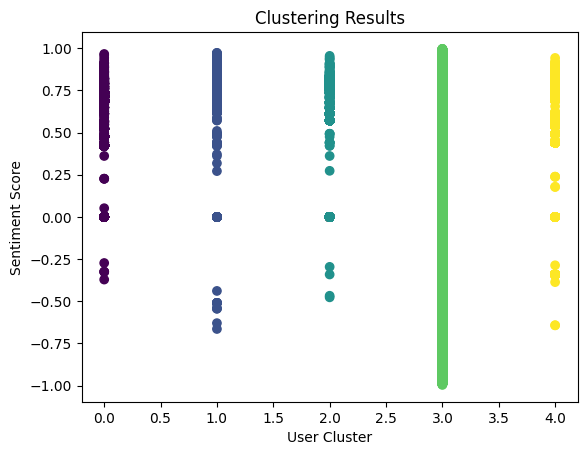

In [22]:
import matplotlib.pyplot as plt

# Plot the clustering results
plt.scatter(reviews['user_cluster'], reviews['sentiment_score'], c=clusters, cmap='viridis')
plt.xlabel('User Cluster')
plt.ylabel('Sentiment Score')
plt.title('Clustering Results')
plt.show()


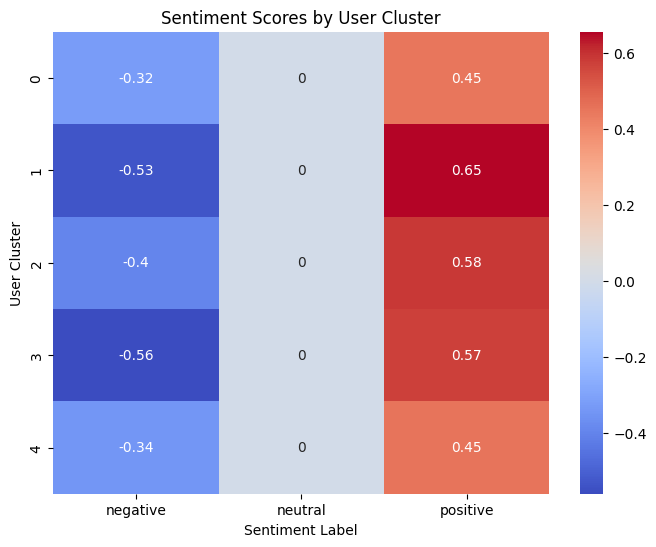

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to calculate the average sentiment score for each user cluster
pivot_table = reviews.pivot_table(index='user_cluster', columns='sentiment_label', values='sentiment_score', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Sentiment Scores by User Cluster')
plt.xlabel('Sentiment Label')
plt.ylabel('User Cluster')
plt.show()


**Trend Analysis:**

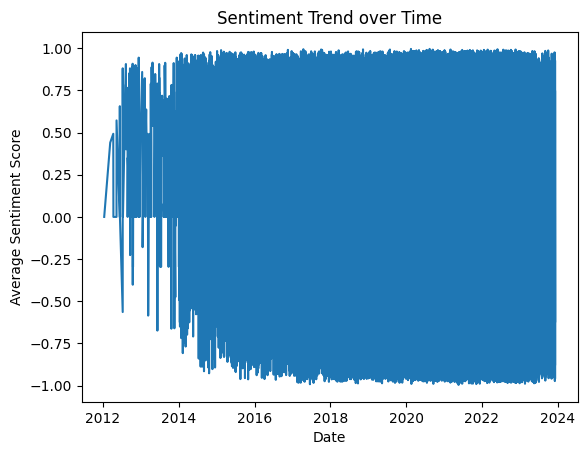

In [24]:
import matplotlib.pyplot as plt

# Convert dates to datetime format
reviews['Date'] = pd.to_datetime(reviews['Date'])

# Group by dates and calculate average sentiment scores
trend_data =reviews.groupby('Date')['sentiment_score'].mean()

# Plot the trend
plt.plot(trend_data.index, trend_data.values)
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Trend over Time')
plt.show()


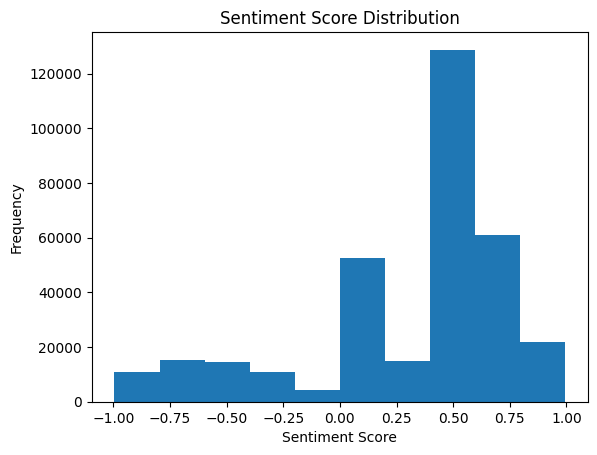

In [25]:
# Plot a histogram of sentiment scores
plt.hist(reviews['sentiment_score'], bins=10)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()


In [26]:
sentiment_distribution = reviews['sentiment_label'].value_counts()
# Print the distribution of sentiment labels
print("Sentiment Distribution:")
print(sentiment_distribution)


Sentiment Distribution:
positive    231679
negative     55881
neutral      47468
Name: sentiment_label, dtype: int64


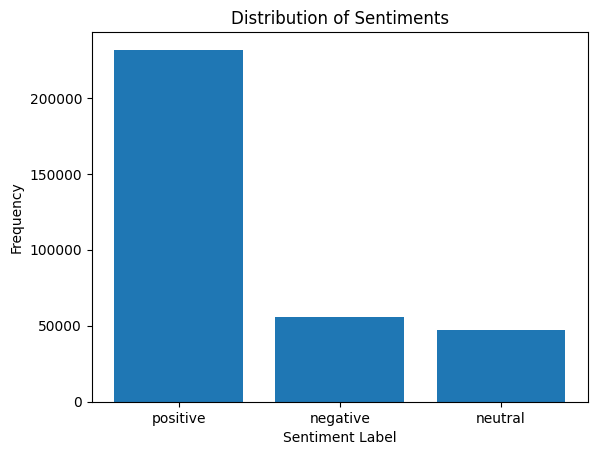

In [27]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
plt.bar(sentiment_distribution.index, sentiment_distribution.values)
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments')
plt.show()


**Comparative Analysis and User Satisfaction**

In [28]:
# Calculate the average app ratings for each healthcare app
average_ratings = reviews.groupby('Healthcare App')['Rating'].mean()

# Print the average ratings
print(average_ratings)

Healthcare App
Apollo 24|7    3.436225
Lybrate        4.195362
Mfine          3.769685
Practo         3.588985
TATA 1mg       4.176667
Name: Rating, dtype: float64


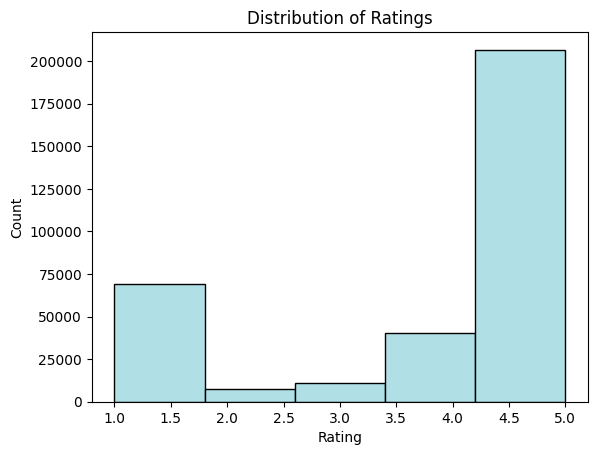

In [29]:
import matplotlib.pyplot as plt

# Plot the distribution of ratings with pastel green color
plt.hist(reviews['Rating'], bins=5, range=(1, 5), edgecolor='black', color='#B0E0E6')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

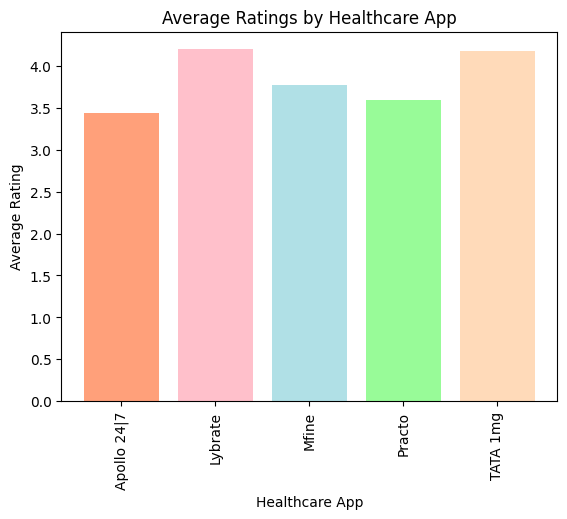

In [30]:
# Identify factors contributing to high or low user satisfaction
positive_reviews = reviews[reviews['sentiment_label'] == 'positive']
negative_reviews = reviews[reviews['sentiment_label'] == 'negative']

positive_factors = positive_reviews['Content'].tolist()
negative_factors = negative_reviews['Content'].tolist()

# Compare ratings across different apps with different pastel colors
ratings_by_app = reviews.groupby('Healthcare App')['Rating'].mean()
colors = ['#FFA07A', '#FFC0CB', '#B0E0E6', '#98FB98', '#FFDAB9']  # Pastel colors
plt.bar(ratings_by_app.index, ratings_by_app.values, color=colors)
plt.xlabel('Healthcare App')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Healthcare App')
plt.xticks(rotation=90)
plt.show()

**Topic Modeling LDA**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Apply TF-IDF vectorization to the reviews
tfidf_matrix = vectorizer.fit_transform(reviews['Content'])

# Apply LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components as needed
lda_model.fit(tfidf_matrix)

# Get the top words for each topic
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10  # Number of top words to display for each topic

for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
    print(f"Topic #{topic_idx+1}:")
    print(top_words)
    print()


Topic #1:
['great', 'app', 'medicine', 'to', 'for', 'easy', 'best', 'and', 'use', 'is']

Topic #2:
['nice', 'app', 'very', 'experience', 'it', 'love', 'this', 'amazing', 'for', 'bad']

Topic #3:
['excellent', 'helpful', 'very', 'delivery', 'fast', 'and', 'service', 'app', 'ok', 'application']

Topic #4:
['the', 'to', 'not', 'and', 'is', 'they', 'of', 'in', 'for', 'it']

Topic #5:
['good', 'app', 'very', 'useful', 'best', 'awesome', 'service', 'gud', 'one', 'its']



In [32]:
# Add topic labels
topic_labels = ['App Feedback', 'User Experience', 'Service Excellence', 'Neutral/Critical Feedback', 'Positive App Aspects']



**Logistic Regression for Sentiment Analysis with Multiclass Labels**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.88      0.88     11058
     neutral       0.92      0.86      0.89      9494
    positive       0.96      0.97      0.96     46454

    accuracy                           0.94     67006
   macro avg       0.92      0.90      0.91     67006
weighted avg       0.94      0.94      0.94     67006

Confusion Matrix:
[[ 9770   309   979]
 [  270  8176  1048]
 [ 1086   411 44957]]
ROC AUC Score: 0.24782943497657278


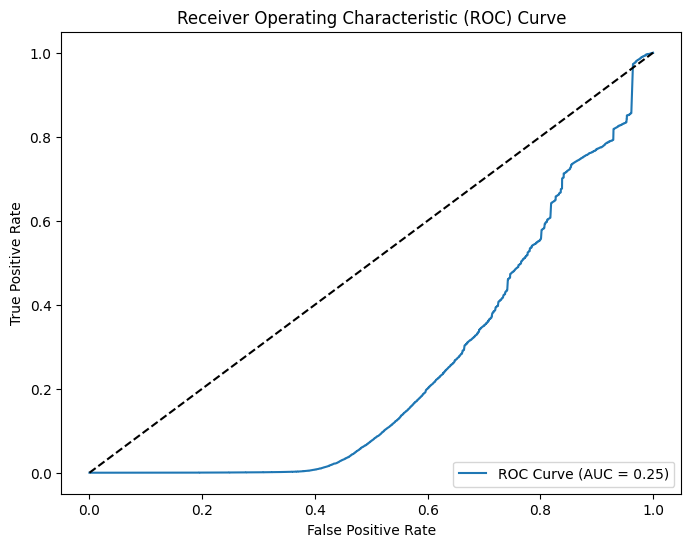

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X = reviews['Content']
y = reviews['sentiment_label']  # Replace 'sentiment_label' with the correct column name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Perform predictions on the test set
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the ROC curve and AUC score
y_test_bin = (y_test == 'positive')  # Replace 'positive' with the desired positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Use the probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
auc_score = roc_auc_score(y_test_bin, y_pred_prob)
print("ROC AUC Score:", auc_score)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


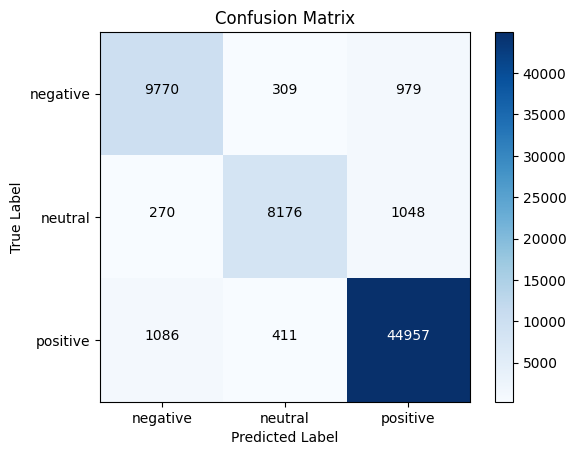

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


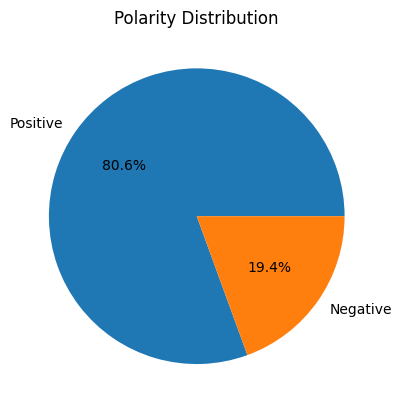

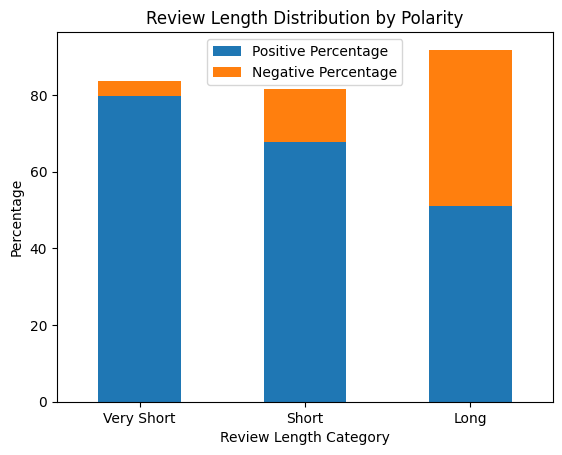

Regression Coefficient (R*): 0.7008822713588321


In [35]:
import seaborn as sns

# Polarity Distribution
positive_percentage = (reviews['sentiment_label'] == 'positive').mean() * 100
negative_percentage = (reviews['sentiment_label'] == 'negative').mean() * 100
labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Polarity Distribution')
plt.show()

# Review Length Distribution
reviews['review_length'] = reviews['Content'].apply(lambda x: len(x.split()))
reviews['review_length_category'] = pd.cut(reviews['review_length'], bins=[0, 5, 10, float('inf')], labels=['Very Short', 'Short', 'Long'])

category_counts = reviews.groupby(['review_length_category', 'sentiment_label']).size().unstack()
category_counts['Total'] = category_counts.sum(axis=1)
category_counts['Positive Percentage'] = (category_counts['positive'] / category_counts['Total']) * 100
category_counts['Negative Percentage'] = (category_counts['negative'] / category_counts['Total']) * 100

category_counts[['Positive Percentage', 'Negative Percentage']].plot(kind='bar', stacked=True)
plt.title('Review Length Distribution by Polarity')
plt.xlabel('Review Length Category')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend()
plt.show()

# Regression Analysis
regression_coefficient = reviews['sentiment_score'].corr(reviews['Rating'])
print(f"Regression Coefficient (R*): {regression_coefficient}")


**Feature Extraction:**

In [36]:
from collections import Counter

# Define the feature keywords
feature_keywords = {
    'user interaction': ['interaction', 'user experience', 'user interface', 'UI'],
    'support team': ['support', 'customer service', 'assistance', 'helpdesk'],
    'appointment scheduling': ['scheduling', 'booking', 'calendar', 'availability'],
    'payment options': ['payment', 'billing', 'transaction', 'credit card', 'debit card'],
    'lab test service': ['lab test', 'diagnostics', 'sample collection', 'report delivery'],
    'prescription refill': ['prescription', 'medication', 'refill', 'pharmacy'],
}

# Create a counter to calculate the frequency of each feature
feature_counter = Counter()

# Iterate over the reviews and count the frequency of each feature
for review in reviews['Content']:
    for feature, keywords in feature_keywords.items():
        if any(keyword in review for keyword in keywords):
            feature_counter[feature] += 1

# Calculate the sentiment associated with each mention of a feature
feature_sentiment = {}

for feature in feature_keywords.keys():
    feature_sentiment[feature] = {'positive': 0, 'negative': 0, 'neutral': 0}

    for index, row in reviews.iterrows():
        for keyword in feature_keywords[feature]:
            if keyword in row['Content']:
                sentiment = row['sentiment_label']
                feature_sentiment[feature][sentiment] += 1

# Analyze the sentiment distribution for each feature
for feature in feature_keywords.keys():
    positive_count = feature_sentiment[feature]['positive']
    negative_count = feature_sentiment[feature]['negative']
    neutral_count = feature_sentiment[feature]['neutral']
    total_count = positive_count + negative_count + neutral_count

    print(f"Feature: {feature}")

    if total_count > 0:
        print(f"Positive Mentions: {positive_count} ({(positive_count / total_count) * 100:.2f}%)")
        print(f"Negative Mentions: {negative_count} ({(negative_count / total_count) * 100:.2f}%)")
        print(f"Neutral Mentions: {neutral_count} ({(neutral_count / total_count) * 100:.2f}%)\n")
    else:
        print("No mentions found for this feature.\n")


Feature: user interaction
Positive Mentions: 830 (70.16%)
Negative Mentions: 291 (24.60%)
Neutral Mentions: 62 (5.24%)

Feature: support team
Positive Mentions: 3900 (41.92%)
Negative Mentions: 5304 (57.01%)
Neutral Mentions: 99 (1.06%)

Feature: appointment scheduling
Positive Mentions: 1801 (51.58%)
Negative Mentions: 1412 (40.44%)
Neutral Mentions: 279 (7.99%)

Feature: payment options
Positive Mentions: 1352 (30.85%)
Negative Mentions: 2672 (60.96%)
Neutral Mentions: 359 (8.19%)

Feature: lab test service
Positive Mentions: 1365 (45.85%)
Negative Mentions: 1413 (47.46%)
Neutral Mentions: 199 (6.68%)

Feature: prescription refill
Positive Mentions: 3870 (46.86%)
Negative Mentions: 3694 (44.73%)
Neutral Mentions: 695 (8.42%)



**Impact of COVID-19:**

In [37]:
from collections import Counter

# Define the COVID-related aspects and their associated keywords
covid_aspects = {
    'telemedicine': ['telemedicine', 'virtual consultation', 'remote healthcare'],
    'safety measures': ['safety measures', 'hygiene protocols', 'sanitization'],
    'remote consultations': ['remote consultations', 'online appointments', 'video visits'],
    # Add more COVID-related aspects and keywords as needed
}

# Split the dataset into pre-COVID and during COVID-19 periods
pre_covid_reviews = reviews[reviews['Date'] < '2020-03-01']  # Adjust the date as per your dataset
covid_reviews = reviews[reviews['Date'] >= '2020-03-01']  # Adjust the date as per your dataset

# Apply sentiment analysis to calculate sentiment score or label for each review
pre_covid_reviews.loc[:, 'sentiment_label'] = pre_covid_reviews['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')
covid_reviews.loc[:, 'sentiment_label'] = covid_reviews['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')


# Analyze the sentiment distribution for each COVID-related aspect
for aspect, keywords in covid_aspects.items():
    aspect_counter = Counter()

    # Count the frequency of each aspect in pre-COVID reviews
    for review in pre_covid_reviews['Content']:
        if any(keyword in review for keyword in keywords):
            aspect_counter['pre_covid'] += 1

    # Count the frequency of each aspect in COVID reviews
    for review in covid_reviews['Content']:
        if any(keyword in review for keyword in keywords):
            aspect_counter['covid'] += 1

    # Calculate sentiment distribution for the aspect in pre-COVID reviews
    pre_covid_sentiment = pre_covid_reviews[pre_covid_reviews['Content'].apply(lambda review: any(keyword in review for keyword in keywords))]
    pre_covid_sentiment_counts = pre_covid_sentiment['sentiment_label'].value_counts()

    # Calculate sentiment distribution for the aspect in COVID reviews
    covid_sentiment = covid_reviews[covid_reviews['Content'].apply(lambda review: any(keyword in review for keyword in keywords))]
    covid_sentiment_counts = covid_sentiment['sentiment_label'].value_counts()

    # Print the results
    print(f"COVID-Related Aspect: {aspect}")
    print(f"Pre-COVID Mentions: {aspect_counter['pre_covid']}")
    print(f"Pre-COVID Sentiment Distribution:")
    print(pre_covid_sentiment_counts)
    print(f"COVID Mentions: {aspect_counter['covid']}")
    print(f"COVID Sentiment Distribution:")
    print(covid_sentiment_counts)
    print()


<ipython-input-37-b1439996ab12>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid_reviews.loc[:, 'sentiment_label'] = pre_covid_reviews['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')
<ipython-input-37-b1439996ab12>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_reviews.loc[:, 'sentiment_label'] = covid_reviews['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')


COVID-Related Aspect: telemedicine
Pre-COVID Mentions: 5
Pre-COVID Sentiment Distribution:
negative    2
positive    2
neutral     1
Name: sentiment_label, dtype: int64
COVID Mentions: 25
COVID Sentiment Distribution:
negative    12
positive    12
neutral      1
Name: sentiment_label, dtype: int64

COVID-Related Aspect: safety measures
Pre-COVID Mentions: 0
Pre-COVID Sentiment Distribution:
Series([], Name: sentiment_label, dtype: int64)
COVID Mentions: 18
COVID Sentiment Distribution:
positive    16
negative     2
Name: sentiment_label, dtype: int64

COVID-Related Aspect: remote consultations
Pre-COVID Mentions: 5
Pre-COVID Sentiment Distribution:
positive    3
neutral     1
negative    1
Name: sentiment_label, dtype: int64
COVID Mentions: 13
COVID Sentiment Distribution:
positive    8
negative    4
neutral     1
Name: sentiment_label, dtype: int64



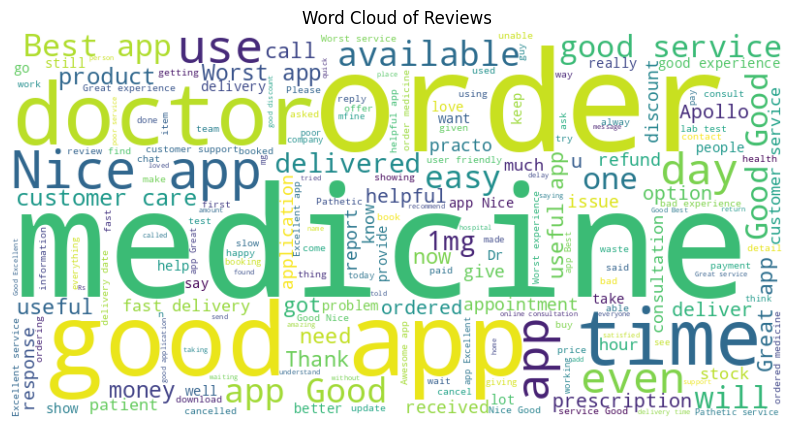

In [40]:
#Overall
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(reviews['Content'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


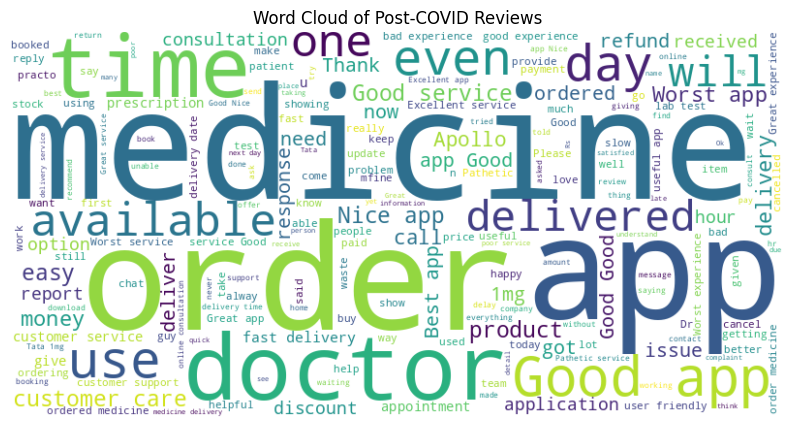

In [41]:
# Post Covid
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter reviews for post-COVID period
post_covid_reviews = reviews[reviews['Date'] >= '2020-03-01']  # Adjust the date as per your dataset

# Combine all post-COVID reviews into a single string
post_covid_all_reviews = ' '.join(post_covid_reviews['Content'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(post_covid_all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post-COVID Reviews')
plt.show()


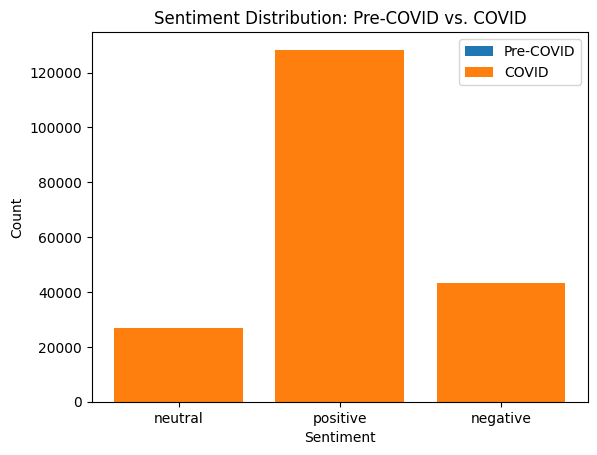

In [44]:
# Calculate sentiment distribution for pre-COVID and COVID reviews
pre_covid_sentiment_counts = pre_covid_reviews['sentiment_label'].value_counts()
covid_sentiment_counts = covid_reviews['sentiment_label'].value_counts()

# Get all sentiment labels
sentiment_labels = list(set(pre_covid_sentiment_counts.index) | set(covid_sentiment_counts.index))

# Get counts for pre-COVID and COVID reviews
pre_covid_counts = [pre_covid_sentiment_counts.get(label, 0) for label in sentiment_labels]
covid_counts = [covid_sentiment_counts.get(label, 0) for label in sentiment_labels]

# Plot the bar chart
plt.bar(sentiment_labels, pre_covid_counts, label='Pre-COVID')
plt.bar(sentiment_labels, covid_counts, label='COVID')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution: Pre-COVID vs. COVID')
plt.legend()

plt.show()



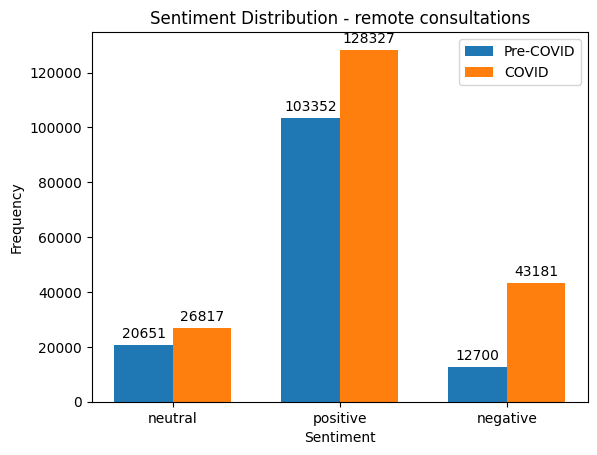

In [45]:
# Plot the sentiment distribution
x = np.arange(len(sentiment_labels))
width = 0.35

fig, ax = plt.subplots()
pre_covid_values = [pre_covid_sentiment_counts[label] if label in pre_covid_sentiment_counts else 0 for label in sentiment_labels]
covid_values = [covid_sentiment_counts[label] if label in covid_sentiment_counts else 0 for label in sentiment_labels]

rects1 = ax.bar(x - width/2, pre_covid_values, width, label='Pre-COVID')
rects2 = ax.bar(x + width/2, covid_values, width, label='COVID')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Frequency')
ax.set_title(f'Sentiment Distribution - {aspect}')
ax.set_xticks(x)
ax.set_xticklabels(sentiment_labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


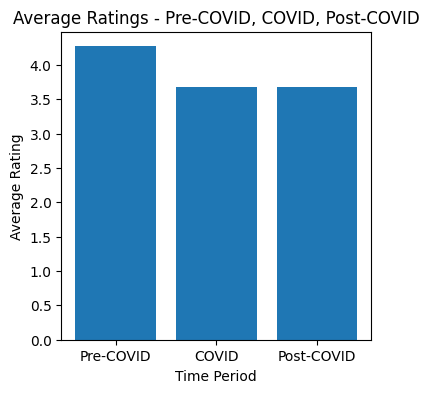

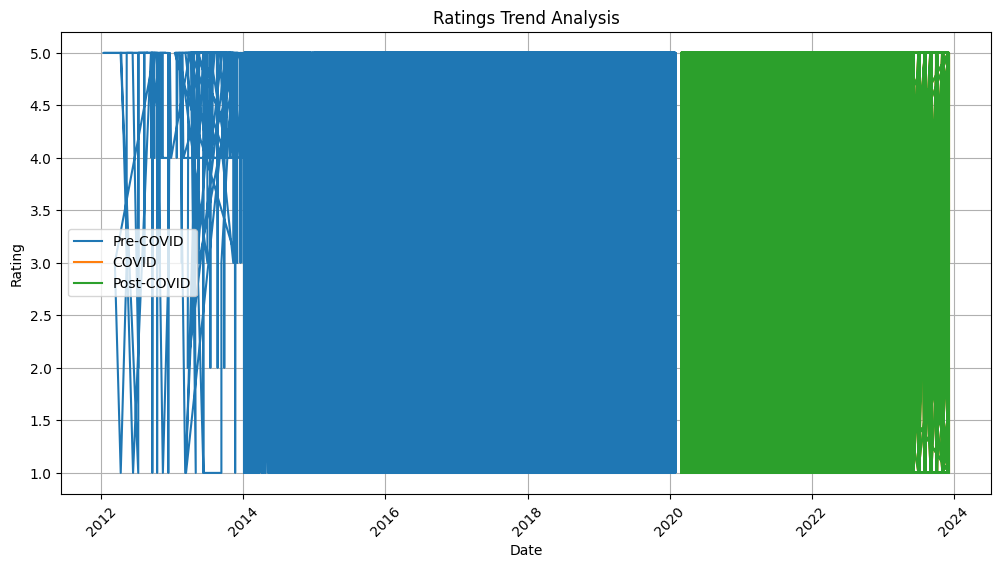

In [46]:
# Filter reviews for the pre-COVID period
pre_covid_reviews = reviews[reviews['Date'] < '2020-01-30']

# Calculate the average ratings for each period
pre_covid_average_rating = pre_covid_reviews['Rating'].mean()
covid_average_rating = covid_reviews['Rating'].mean()
post_covid_average_rating = post_covid_reviews['Rating'].mean()

# Create a bar chart to compare average ratings
plt.figure(figsize=(4,4))
plt.bar(['Pre-COVID', 'COVID', 'Post-COVID'], [pre_covid_average_rating, covid_average_rating, post_covid_average_rating])
plt.title('Average Ratings - Pre-COVID, COVID, Post-COVID')
plt.xlabel('Time Period')
plt.ylabel('Average Rating')
plt.show()

# Create a line chart to visualize the trend of ratings over time
plt.figure(figsize=(12, 6))
plt.plot(pre_covid_reviews['Date'], pre_covid_reviews['Rating'], label='Pre-COVID')
plt.plot(covid_reviews['Date'], covid_reviews['Rating'], label='COVID')
plt.plot(post_covid_reviews['Date'], post_covid_reviews['Rating'], label='Post-COVID')
plt.title('Ratings Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


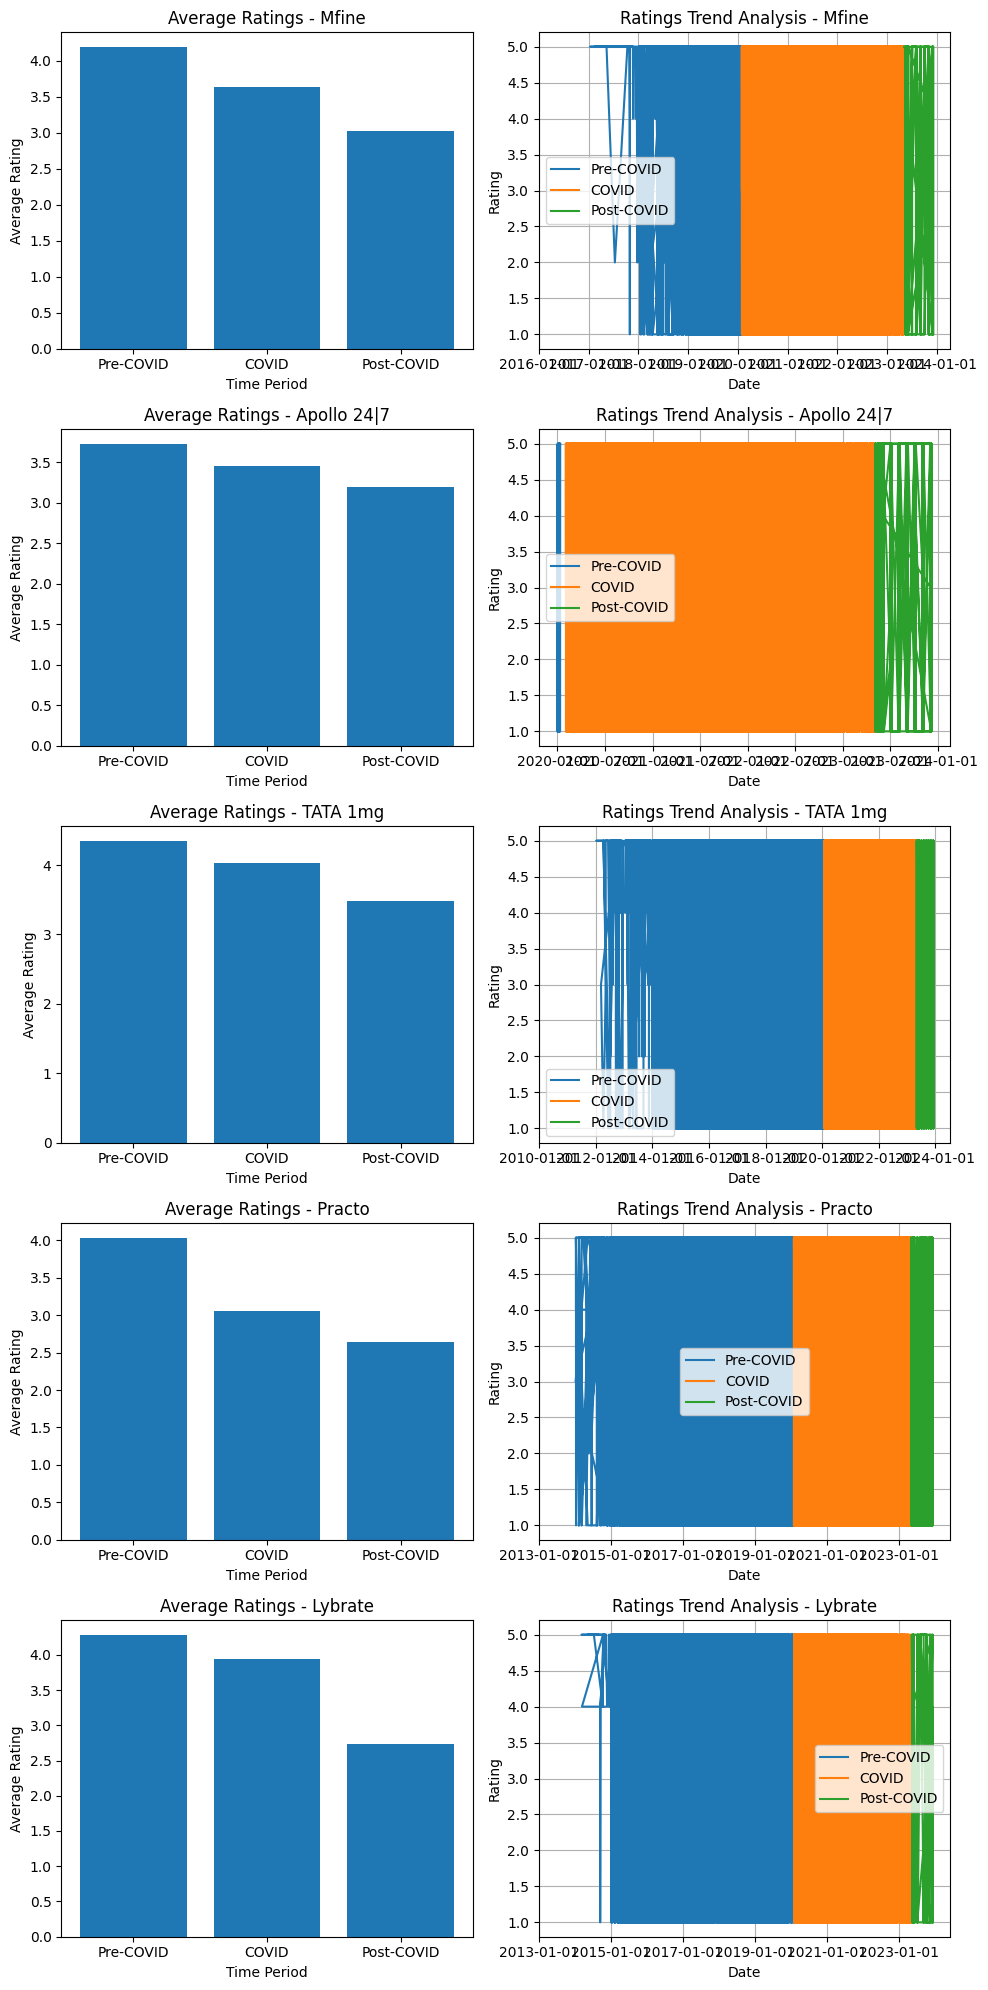

In [47]:
# List of healthcare apps
healthcare_apps = ['Mfine', 'Apollo 24|7', 'TATA 1mg', 'Practo', 'Lybrate']

# Create subplots for each app
fig, axs = plt.subplots(len(healthcare_apps), 2, figsize=(10, 4*len(healthcare_apps)))

for i, app in enumerate(healthcare_apps):
    # Filter reviews for each app and time period
    pre_covid_reviews = reviews[(reviews['Healthcare App'] == app) & (reviews['Date'] < '2020-01-30')]
    covid_reviews = reviews[(reviews['Healthcare App'] == app) & (reviews['Date'] >= '2020-01-30') & (reviews['Date'] <= '2023-05-05')]
    post_covid_reviews = reviews[(reviews['Healthcare App'] == app) & (reviews['Date'] > '2023-05-05')]

    # Calculate the average ratings for each period and app
    pre_covid_average_rating = pre_covid_reviews['Rating'].mean()
    covid_average_rating = covid_reviews['Rating'].mean()
    post_covid_average_rating = post_covid_reviews['Rating'].mean()

    # Create bar charts to compare average ratings for each app
    axs[i, 0].bar(['Pre-COVID', 'COVID', 'Post-COVID'], [pre_covid_average_rating, covid_average_rating, post_covid_average_rating])
    axs[i, 0].set_title(f'Average Ratings - {app}')
    axs[i, 0].set_xlabel('Time Period')
    axs[i, 0].set_ylabel('Average Rating')

    # Create line charts to visualize the trend of ratings over time for each app
    axs[i, 1].plot(pre_covid_reviews['Date'], pre_covid_reviews['Rating'], label='Pre-COVID')
    axs[i, 1].plot(covid_reviews['Date'], covid_reviews['Rating'], label='COVID')
    axs[i, 1].plot(post_covid_reviews['Date'], post_covid_reviews['Rating'], label='Post-COVID')
    axs[i, 1].set_title(f'Ratings Trend Analysis - {app}')
    axs[i, 1].set_xlabel('Date')
    axs[i, 1].set_ylabel('Rating')
    axs[i, 1].set_xticks(axs[i, 1].get_xticks()[::int(len(axs[i, 1].get_xticks()) / 6)])
    axs[i, 1].legend()
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()
